Randomly sampled to avoid class imbalance

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

bbm_tweets_df = pd.read_csv("./datasets/bbm_tweets_oct4-9.csv")
leni_tweets_df = pd.read_csv("./datasets/leni_tweets_oct4-9.csv")

In [398]:
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Gadugi"]

Text(0.25, 0.15, 'Source: Scraped Twitter data from Oct. 4-9 (UTC)')

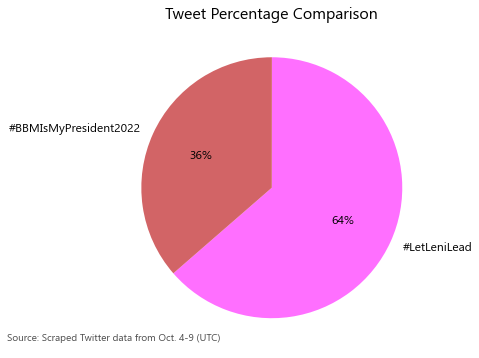

In [429]:
fig = plt.figure(figsize=(14,6))
plt.pie([leni_tweets_df.shape[0], bbm_tweets_df.shape[0]], colors=["#FF6FFF", "#D26466"], autopct="%.f%%", 
        textprops={"fontsize": 12}, startangle=-139, labels=["#LetLeniLead", "#BBMIsMyPresident2022"])
plt.title("Tweet Percentage Comparison", fontdict={"fontsize": 16})

fig.text(0.25, 0.15,"Source: Scraped Twitter data from Oct. 4-9 (UTC)", alpha=0.7)

In [442]:
print("BBM Total:", bbm_tweets_df.shape[0])
print("Leni Total:", leni_tweets_df.shape[0])

BBM Total: 25366
Leni Total: 44321


In [375]:
def set_criteria(df):
    criteria = (df["Following"] > df["Followers"]) & (pd.DatetimeIndex(df["AccountCreated"]).year > 2018) & (df["Followers"] < 100) & (df["Verified"] == False)
    return df[criteria]

leni_c = set_criteria(leni_tweets_df.sample(20000))
bbm_c = set_criteria(bbm_tweets_df.sample(20000))

Text(0.09, 0.09, 'Source: Scraped Twitter data from Oct. 4-9 (UTC)')

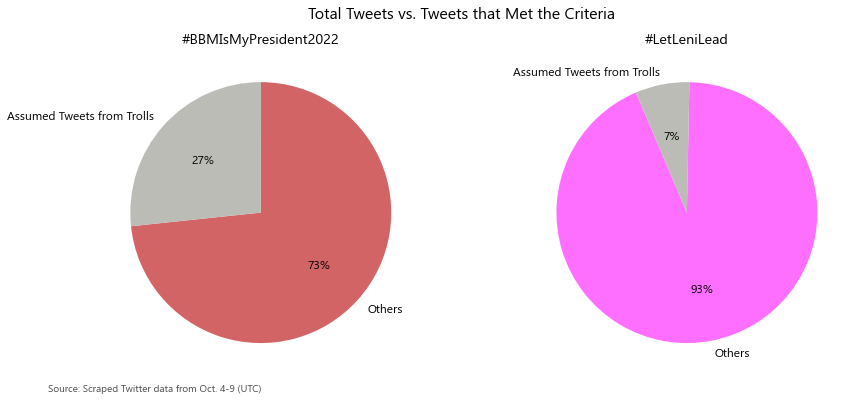

In [409]:
fig, ax = plt.subplots(1,2,figsize=(14,6))

ax[0].pie([bbm_tweets_df.shape[0], bbm_c.shape[0]], startangle=186, colors=["#D26466", "#BBBCB6"], 
          autopct="%.f%%", textprops={"fontsize": 12}, labels=["Others", "Assumed Tweets from Trolls"])
ax[1].pie([leni_tweets_df.shape[0], leni_c.shape[0]], startangle=113, colors=["#FF6FFF", "#BBBCB6"], 
          autopct="%.f%%", textprops={"fontsize": 12}, labels=["Others", "Assumed Tweets from Trolls"])
ax[0].set_title("#BBMIsMyPresident2022")
ax[1].set_title("#LetLeniLead")

fig.suptitle("Total Tweets vs. Tweets that Met the Criteria", fontsize=16)

fig.text(.09, 0.09, "Source: Scraped Twitter data from Oct. 4-9 (UTC)", alpha=0.7)

In [443]:
print("BBM Total:", bbm_c.shape[0])
print("Leni Total:", leni_c.shape[0])

BBM Total: 9234
Leni Total: 3179


Text(0.1, 0.09, 'Source: Scraped Twitter data from Oct. 4-9 (UTC)')

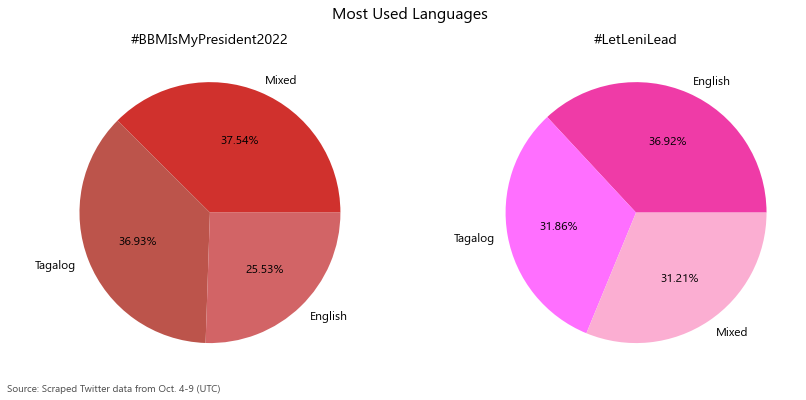

In [395]:
fig, ax = plt.subplots(1,2,figsize=(14,6))

bbm_tweets_df["Language"].value_counts().head(3).plot(kind="pie", labels=["Mixed", "Tagalog", "English"], autopct="%.2f%%",
                                                     colors=["#D0312D", "#BC544B", "#D26466"], title="#BBMIsMyPresident2022",
                                                     ax=ax[0], textprops={"fontsize": 12})
leni_tweets_df["Language"].value_counts().head(3).plot(kind="pie", labels=["English", "Tagalog", "Mixed"], autopct="%.2f%%",
                                                     colors=["#ef3ba7", "#FF6FFF", "#FBAED2"], title="#LetLeniLead",
                                                     ax=ax[1], textprops={"fontsize": 12})
ax[0].set_ylabel("")
ax[1].set_ylabel("")
fig.suptitle("Most Used Languages", fontsize=16)

fig.text(0.1,0.09,"Source: Scraped Twitter data from Oct. 4-9 (UTC)", alpha=0.7)

In [444]:
bbm_tweets_df["Language"].value_counts().head(3)

und    9183
tl     9033
en     6245
Name: Language, dtype: int64

In [445]:
leni_tweets_df["Language"].value_counts().head(3)

en     15590
tl     13454
und    13180
Name: Language, dtype: int64

Text(0.08, 0.05, 'Source: Scraped Twitter data from Oct. 4-9 (UTC)')

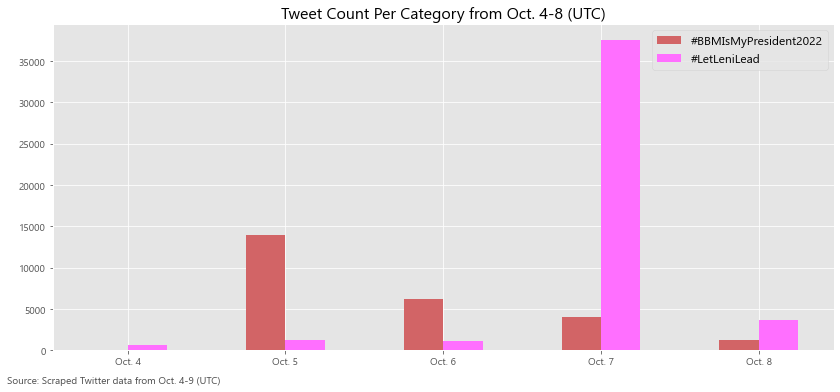

In [431]:
date_bbm = pd.DatetimeIndex(bbm_tweets_df["Datetime"]).day.value_counts().sort_index()
date_leni = pd.DatetimeIndex(leni_tweets_df["Datetime"]).day.value_counts().sort_index()

xaxis = np.arange(5)

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.bar(xaxis, date_bbm, width=0.25, color="#D26466", label="#BBMIsMyPresident2022")
ax.bar(xaxis+0.25, date_leni, width=0.25, color="#FF6FFF", label="#LetLeniLead")
ax.set_xticks(xaxis+0.25/2)
ax.set_xticklabels(["Oct. 4", "Oct. 5", "Oct. 6", "Oct. 7", "Oct. 8"])
ax.legend(prop={"size": 12})
ax.set_title("Tweet Count Per Category from Oct. 4-8 (UTC)", fontsize=16)

fig.text(0.08,0.05,"Source: Scraped Twitter data from Oct. 4-9 (UTC)", alpha=0.7)

In [446]:
pd.DatetimeIndex(bbm_tweets_df["Datetime"]).day.value_counts()

5    13971
6     6160
7     3982
8     1247
4        6
Name: Datetime, dtype: int64

In [447]:
pd.DatetimeIndex(leni_tweets_df["Datetime"]).day.value_counts()

7    37580
8     3691
5     1253
6     1174
4      623
Name: Datetime, dtype: int64

Text(0.01, -0.05, 'Note: Ranges of X axes are not similar.\nSource: Scraped Twitter data from Oct. 4-9 (UTC)')

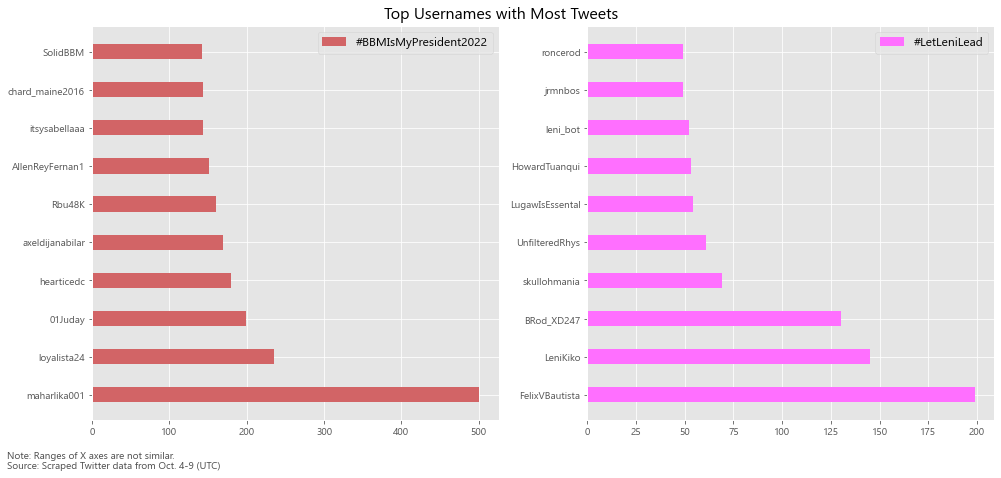

In [432]:
user_bbm = bbm_tweets_df["Username"].value_counts().head(10)
user_leni = leni_tweets_df["Username"].value_counts().head(10)

fig, axes = plt.subplots(1,2,figsize=(14,6))

axes[0].barh(user_bbm.index, user_bbm, height=0.4, color="#D26466", label="#BBMIsMyPresident2022")
axes[0].legend(prop={"size": 12})
axes[1].barh(user_leni.index, user_leni, height=0.4, color="#FF6FFF", label="#LetLeniLead")
axes[1].legend(prop={"size": 12})
#axes[1].set_xlim(0,530)

fig.tight_layout() 
fig.suptitle("Top Usernames with Most Tweets", fontsize=16, y=1.02)

fig.text(.01,-.05,"Note: Ranges of X axes are not similar.\nSource: Scraped Twitter data from Oct. 4-9 (UTC)", alpha=0.7)

# take note of the x axes, both are not the same

In [448]:
user_bbm

maharlika001       501
loyalista24        235
01Juday            199
hearticedc         180
axeldijanabilar    169
Rbu48K             160
AllenReyFernan1    151
itsysabellaaa      143
chard_maine2016    143
SolidBBM           142
Name: Username, dtype: int64

In [449]:
user_leni

FelixVBautista     199
LeniKiko           145
BRod_XD247         130
skullohmania        69
UnfilteredRhys      61
LugawIsEssental     54
HowardTuanqui       53
leni_bot            52
jrmnbos             49
roncerod            49
Name: Username, dtype: int64

Text(0.09, 0.03, 'Source: Scraped Twitter data from Oct. 4-9 (UTC)')

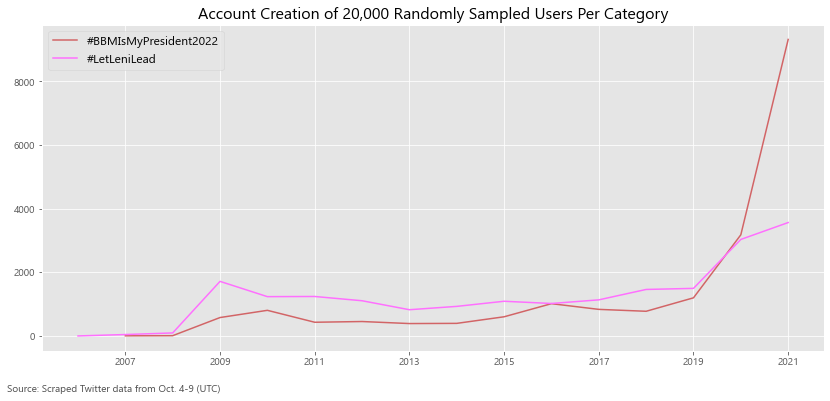

In [440]:
creation_bbm = pd.DatetimeIndex(bbm_tweets_df["AccountCreated"].sample(20000, random_state=0)).year.value_counts().sort_index()
creation_leni = pd.DatetimeIndex(leni_tweets_df["AccountCreated"].sample(20000, random_state=0)).year.value_counts().sort_index()

fig, ax = plt.subplots(1,1,figsize=(14,6))

ax.plot(creation_bbm, color="#D26466", label="#BBMIsMyPresident2022")
ax.plot(creation_leni, color="#FF6FFF", label="#LetLeniLead")
plt.legend(prop={"size": 12})
plt.xticks([2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021])
ax.set_title("Account Creation of 20,000 Randomly Sampled Users Per Category", fontsize=16)

fig.text(.09,0.03,"Source: Scraped Twitter data from Oct. 4-9 (UTC)", alpha=0.7)

In [20]:
bbm_tweets_df["Username"].sample(20000, random_state=0).value_counts().mean()

3.031221582297666

In [21]:
leni_tweets_df["Username"].sample(20000, random_state=0).value_counts().mean()

1.2615908660821296

In [16]:
bbm_tweets_df["Username"].nunique()

7707

In [17]:
leni_tweets_df["Username"].nunique()

30325